In [6]:
from datasets import load_dataset

#사전학습 Vision 트랜스포머 불러오기
from transformers import ViTImageProcessor, ViTForImageClassification
# from transformers import ViTFeatureExtractor, ViTForImageClassification
from sklearn.neighbors import NearestNeighbors
import torch
import warnings
warnings.filterwarnings('ignore')

In [7]:
def extract_embeddings(dataset, model, feature_extractor):
    model.eval()
    embeddings = []
    with torch.no_grad():
        for item in dataset:
            inputs = feature_extractor(images=item['image'], return_tensors="pt")
            outputs = model(**inputs)
            embeddings.append(outputs.logits.squeeze().numpy())
    return embeddings


def retrieve_images(index, nn_model, dataset, embeddings):
    index = int(index)
    distances, indices = nn_model.kneighbors([embeddings[index]])

    indexed_distances = [(int(i), dist) for i, dist in zip(indices[0], distances[0]) if i != index]

    indexed_distances.sort(key=lambda x: x[1])

    retrieved_images = [dataset[idx]["image"] for idx, _ in indexed_distances]
    return retrieved_images

def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        img = dataset["train"][i]["image"]
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()

def preprocess(batch):
    inputs = feature_extractor_vanilla(
        batch['image'],
        return_tensors='pt'
    )
    inputs['labels'] = batch['labels']
    return inputs



# 배치 텐서별 텐서와 레이블을 올바르게 정렬
def collate_batch(batch):
    pixel_vals = [item['pixel_values'] for item in batch]
    labels = [item['labels'] for item in batch]
    return {'pixel_values': torch.stack(pixel_vals), 'labels': torch.tensor(labels)}

import numpy as np
from datasets import load_metric

accuracy_metric = load_metric("accuracy")

def evaluate_model_performance(outputs):
    predicted_labels = np.argmax(outputs.predictions, axis=1)
    true_labels = outputs.label_ids
    return accuracy_metric.compute(predictions=predicted_labels, references=true_labels)

In [8]:
dataset_train = load_dataset("keremberke/shoe-classification",'full', split='train')
dataset_test = load_dataset("keremberke/shoe-classification",'full', split='validation')

train_prepared = dataset_train.with_transform(preprocess)
test_prepared = dataset_test.with_transform(preprocess)

num_labels_in_dataset = len(set(dataset_train['labels']))
label_names = dataset_train.features['labels'].names

# 파인튜닝 결과 가져오기
- 파인튜닝은 터미널창에서 실행하기

In [24]:
%%time
fine_tuned_path = './../../shoe'
model_finetuned = ViTForImageClassification.from_pretrained(fine_tuned_path)
feature_extractor_finetuned = ViTImageProcessor.from_pretrained(fine_tuned_path)
model_finetuned.classifier = torch.nn.Identity()

embeddings_ft = extract_embeddings(dataset_train, model_finetuned, feature_extractor_finetuned)

nn_model_ft = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
nn_model_ft.fit(embeddings_ft)

CPU times: user 9min, sys: 1.01 s, total: 9min 1s
Wall time: 35.5 s


NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

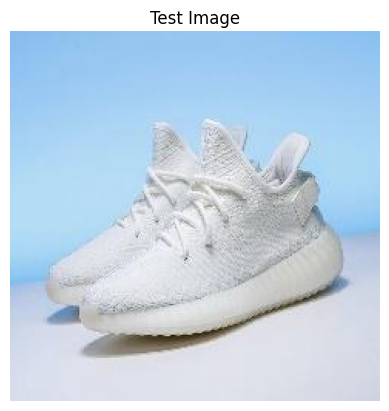

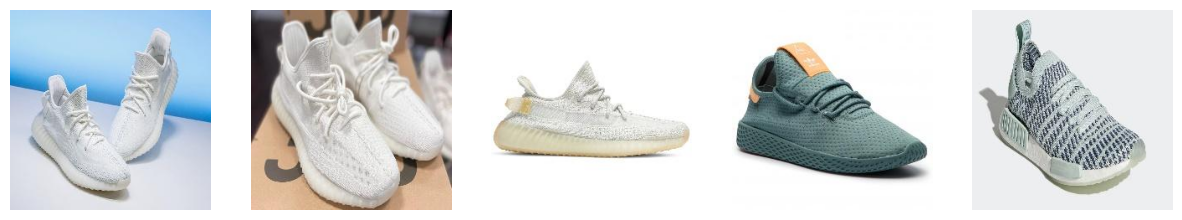

In [25]:
import matplotlib.pyplot as plt
test_index = 94
retrieved_images = retrieve_images(test_index, nn_model_ft, dataset_train,embeddings_ft)
plt.imshow(dataset_train[test_index]["image"])
plt.title("Test Image")
plt.axis('off')
plt.show()

show_images({"train": [{"image": img} for img in retrieved_images]})

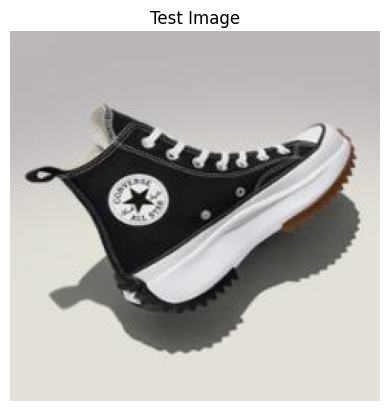

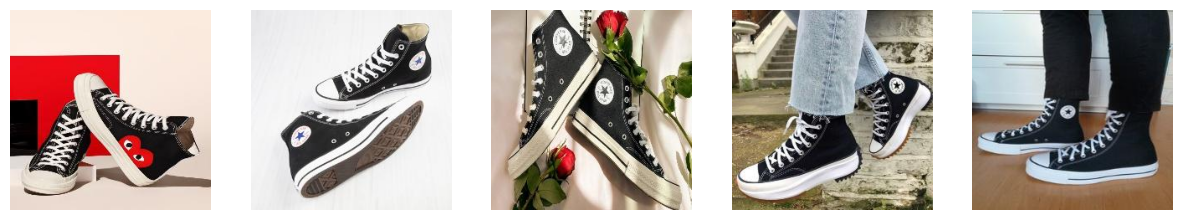

In [26]:
test_index = 358
retrieved_images = retrieve_images(test_index, nn_model_ft, dataset_train,embeddings_ft)
plt.imshow(dataset_train[test_index]["image"])
plt.title("Test Image")
plt.axis('off')
plt.show()

show_images({"train": [{"image": img} for img in retrieved_images]})

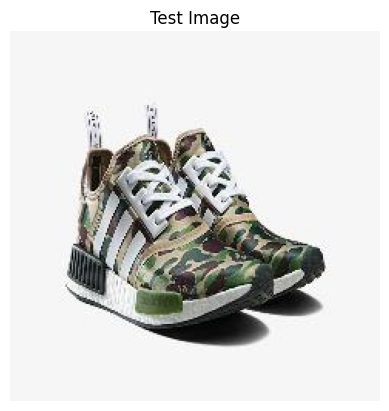

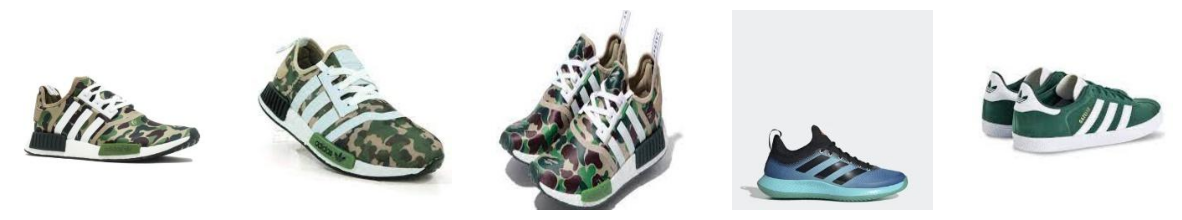

In [27]:
test_index = 174
retrieved_images = retrieve_images(test_index, nn_model_ft, dataset_train,embeddings_ft)
plt.imshow(dataset_train[test_index]["image"])
plt.title("Test Image")
plt.axis('off')
plt.show()

show_images({"train": [{"image": img} for img in retrieved_images]})

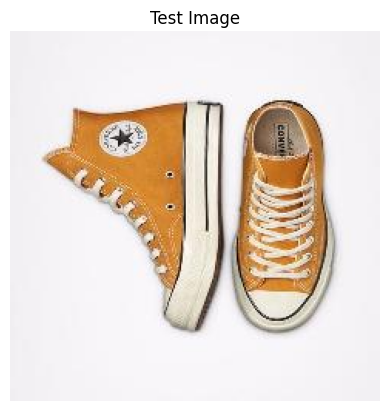

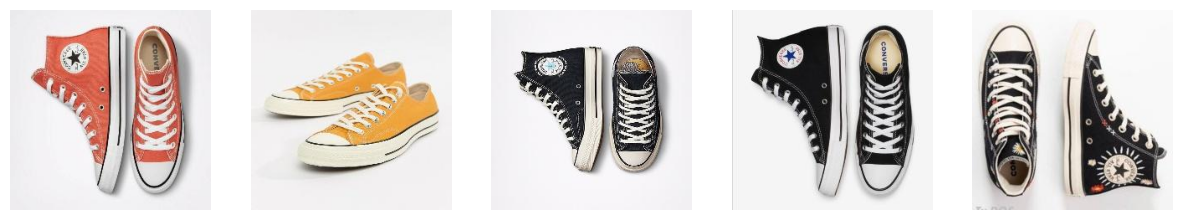

In [28]:
test_index =383
retrieved_images = retrieve_images(test_index, nn_model_ft, dataset_train,embeddings_ft)
plt.imshow(dataset_train[test_index]["image"])
plt.title("Test Image")
plt.axis('off')
plt.show()

show_images({"train": [{"image": img} for img in retrieved_images]})

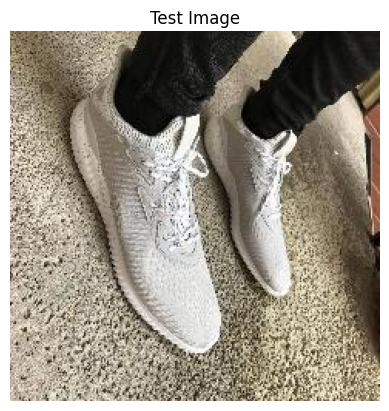

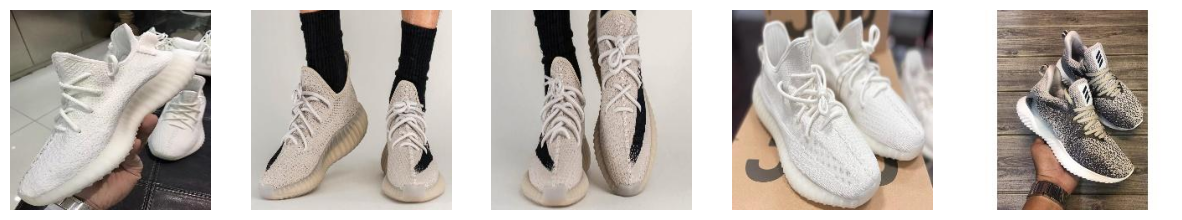

In [29]:
test_index = 65
retrieved_images = retrieve_images(test_index, nn_model_ft, dataset_train,embeddings_ft)
plt.imshow(dataset_train[test_index]["image"])
plt.title("Test Image")
plt.axis('off')
plt.show()

show_images({"train": [{"image": img} for img in retrieved_images]})